In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopy as gpy
import folium

In [2]:
df = pd.read_csv('NYC_subway_traffic_2017-2021.csv')
df.columns.tolist()

['Unique ID',
 'Datetime',
 'Stop Name',
 'Remote Unit',
 'Line',
 'Connecting Lines',
 'Daytime Routes',
 'North Direction Label',
 'South Direction Label',
 'Division',
 'Structure',
 'Borough',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'Entries',
 'Exits']

In [3]:
# Convert to datetime type (required)
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Change how it's displayed (e.g., YYYY-MM-DD HH:MM format)
df['Datetime_formatted'] = df['Datetime'].dt.strftime('%Y-%m-%d %H')
df.drop(columns=['Datetime','Unique ID','Remote Unit'], inplace=True)

In [4]:
print(df['Borough'].unique())
print(df['Structure'].unique())
print(df['Division'].unique())

['M' 'Q' 'Bx' 'Bk']
['Subway' 'Elevated' 'Open Cut' 'At Grade' 'Viaduct']
['IRT' 'IND' 'BMT']


In [5]:
df

,Stop Name,Line,Connecting Lines,Daytime Routes,North Direction Label,South Direction Label,Division,Structure,Borough,Neighborhood,Latitude,Longitude,Entries,Exits,Datetime_formatted
0,103 St,Lexington Av,6,6,Uptown Bronx,Downtown,IRT,Subway,M,East Harlem,40.790600,-73.947478,403.0,222.0,2017-02-04 04
1,103 St,Broadway - 7Av,1,1,Uptown Bronx,Downtown,IRT,Subway,M,Upper West Side,40.799446,-73.968379,119.0,145.0,2017-02-04 04
2,103 St,8th Av - Fulton St,BC,BC,Uptown Bronx,Downtown Brooklyn,IND,Subway,M,Upper West Side,40.796092,-73.961454,55.0,81.0,2017-02-04 04
3,111 St,Liberty Av,A,A,Manhattan,Lefferts Blvd,IND,Elevated,Q,South Ozone Park/Howard Beach,40.684331,-73.832163,156.0,30.0,2017-02-04 04
4,116 St,Lexington Av,6,6,Uptown Bronx,Downtown,IRT,Subway,M,East Harlem,40.798629,-73.941617,495.0,303.0,2017-02-04 04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4589375,5 Av/53 St,Queens Blvd,EM,EM,Queens,Downtown Brooklyn,IND,Subway,M,Clinton/Chelsea,40.760167,-73.975224,1182.0,646.0,2021-08-13 20
4589376,5 Av/59 St,Astoria,NQR,NWR,Queens,Downtown Brooklyn,BMT,Subway,M,Upper West Side,40.764811,-73.973347,1274.0,445.0,2021-08-13 20
4589377,Fulton St,"Clark St, Lexington Av",2345ACJZ,2345,Uptown Bronx Uptown Bronx,Downtown Brooklyn Downtown Brooklyn,IRT,Subway,M,Financial District,40.709892,-74.008040,433.0,549.0,2021-08-13 20
4589378,Fulton St,Jamaica,ACJZ2345,JZ,Brooklyn,Broad St,BMT,Subway,M,Financial District,40.710374,-74.007582,491.0,844.0,2021-08-13 20


In [6]:
unique_counts = df.nunique()
unique_counts

Stop Name                  345
Line                        45
Connecting Lines           103
Daytime Routes              71
North Direction Label       45
South Direction Label       42
Division                     3
Structure                    5
Borough                      4
Neighborhood                51
Latitude                   440
Longitude                  440
Entries                  21752
Exits                    19151
Datetime_formatted        9911
dtype: int64

In [7]:
# Ensure datetime is parsed
df['Datetime_formatted'] = pd.to_datetime(df['Datetime_formatted'])

# Extract components
df['Year'] = df['Datetime_formatted'].dt.year
df['Month'] = df['Datetime_formatted'].dt.month
df['Day'] = df['Datetime_formatted'].dt.day
df['Hour'] = df['Datetime_formatted'].dt.hour

filtered_df = df.copy()

In [8]:
filtered_df

,Stop Name,Line,Connecting Lines,Daytime Routes,North Direction Label,South Direction Label,Division,Structure,Borough,Neighborhood,Latitude,Longitude,Entries,Exits,Datetime_formatted,Year,Month,Day,Hour
0,103 St,Lexington Av,6,6,Uptown Bronx,Downtown,IRT,Subway,M,East Harlem,40.790600,-73.947478,403.0,222.0,2017-02-04 04:00:00,2017,2,4,4
1,103 St,Broadway - 7Av,1,1,Uptown Bronx,Downtown,IRT,Subway,M,Upper West Side,40.799446,-73.968379,119.0,145.0,2017-02-04 04:00:00,2017,2,4,4
2,103 St,8th Av - Fulton St,BC,BC,Uptown Bronx,Downtown Brooklyn,IND,Subway,M,Upper West Side,40.796092,-73.961454,55.0,81.0,2017-02-04 04:00:00,2017,2,4,4
3,111 St,Liberty Av,A,A,Manhattan,Lefferts Blvd,IND,Elevated,Q,South Ozone Park/Howard Beach,40.684331,-73.832163,156.0,30.0,2017-02-04 04:00:00,2017,2,4,4
4,116 St,Lexington Av,6,6,Uptown Bronx,Downtown,IRT,Subway,M,East Harlem,40.798629,-73.941617,495.0,303.0,2017-02-04 04:00:00,2017,2,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4589375,5 Av/53 St,Queens Blvd,EM,EM,Queens,Downtown Brooklyn,IND,Subway,M,Clinton/Chelsea,40.760167,-73.975224,1182.0,646.0,2021-08-13 20:00:00,2021,8,13,20
4589376,5 Av/59 St,Astoria,NQR,NWR,Queens,Downtown Brooklyn,BMT,Subway,M,Upper West Side,40.764811,-73.973347,1274.0,445.0,2021-08-13 20:00:00,2021,8,13,20
4589377,Fulton St,"Clark St, Lexington Av",2345ACJZ,2345,Uptown Bronx Uptown Bronx,Downtown Brooklyn Downtown Brooklyn,IRT,Subway,M,Financial District,40.709892,-74.008040,433.0,549.0,2021-08-13 20:00:00,2021,8,13,20
4589378,Fulton St,Jamaica,ACJZ2345,JZ,Brooklyn,Broad St,BMT,Subway,M,Financial District,40.710374,-74.007582,491.0,844.0,2021-08-13 20:00:00,2021,8,13,20


In [9]:
# Extract year
filtered_df['Year'] = filtered_df['Datetime_formatted'].dt.year

# Years to analyze
years = range(2017, 2022)

for year in years:
    # Filter data for the year
    df_year = filtered_df[filtered_df['Year'] == year]
    
    # Group by Stop Name and sum Entries and Exits
    traffic_by_station = df_year.groupby('Stop Name')[['Entries', 'Exits']].sum()
    
    # Calculate total traffic and net flow
    traffic_by_station['Total_Traffic'] = traffic_by_station['Entries'] + traffic_by_station['Exits']
    traffic_by_station['Net_Flow'] = traffic_by_station['Entries'] - traffic_by_station['Exits']
    
    # Find station with max total traffic
    most_populated_station = traffic_by_station['Total_Traffic'].idxmax()
    max_traffic_value = traffic_by_station['Total_Traffic'].max()
    
    # Find station with max net inflow
    station_with_max_net_flow = traffic_by_station['Net_Flow'].idxmax()
    max_net_flow_value = traffic_by_station['Net_Flow'].max()
    print(most_populated_station)
    print(max_traffic_value)
    print(station_with_max_net_flow)
    print(max_net_flow_value)
    
    print(f"Year {year}:")
    print(f"  Station with highest total traffic: {most_populated_station} ({max_traffic_value} entries + exits)")
    print(f"  Station with highest net inflow: {station_with_max_net_flow} ({max_net_flow_value} entries - exits)\n")


Grand Central - 42 St
74467114.0
23 St
8889077.0
Year 2017:
  Station with highest total traffic: Grand Central - 42 St (74467114.0 entries + exits)
  Station with highest net inflow: 23 St (8889077.0 entries - exits)

Grand Central - 42 St
83854650.0
23 St
9858347.0
Year 2018:
  Station with highest total traffic: Grand Central - 42 St (83854650.0 entries + exits)
  Station with highest net inflow: 23 St (9858347.0 entries - exits)

Grand Central - 42 St
82512856.0
23 St
9180055.0
Year 2019:
  Station with highest total traffic: Grand Central - 42 St (82512856.0 entries + exits)
  Station with highest net inflow: 23 St (9180055.0 entries - exits)

34 St - Penn Station
38221194.0
DeKalb Av
2032923.0
Year 2020:
  Station with highest total traffic: 34 St - Penn Station (38221194.0 entries + exits)
  Station with highest net inflow: DeKalb Av (2032923.0 entries - exits)

34 St - Penn Station
21993714.0
Jamaica - 179 St
810905.0
Year 2021:
  Station with highest total traffic: 34 St - Pen

In [10]:
# Stations of interest
stations = ['Grand Central - 42 St','23 St']

# Ensure datetime is datetime type
filtered_df['Datetime_formatted'] = pd.to_datetime(filtered_df['Datetime_formatted'])
filtered_df['Year'] = filtered_df['Datetime_formatted'].dt.year

years = range(2017, 2022)

for year in years:
    df_year = filtered_df[filtered_df['Year'] == year]

    # Filter only for the two stations
    df_year_stations = df_year[df_year['Stop Name'].isin(stations)]
    
    # Group and sum Entries and Exits
    traffic_by_station = df_year_stations.groupby('Stop Name')[['Entries', 'Exits']].sum()
    
    # Calculate total traffic and net flow
    traffic_by_station['Total_Traffic'] = traffic_by_station['Entries'] + traffic_by_station['Exits']
    traffic_by_station['Net_Flow'] = traffic_by_station['Entries'] - traffic_by_station['Exits']
    
    # Find station with max total traffic among these two
    most_populated_station = traffic_by_station['Total_Traffic'].idxmax()
    max_traffic_value = traffic_by_station['Total_Traffic'].max()
    
    # Find station with max net inflow among these two
    station_with_max_net_flow = traffic_by_station['Net_Flow'].idxmax()
    max_net_flow_value = traffic_by_station['Net_Flow'].max()
    
    print(f"Year {year}:")
    print(f"  Among {stations}, station with highest total traffic: {most_populated_station} ({max_traffic_value} entries + exits)")
    print(f"  Among {stations}, station with highest net inflow: {station_with_max_net_flow} ({max_net_flow_value} entries - exits)\n")


Year 2017:
  Among ['Grand Central - 42 St', '23 St'], station with highest total traffic: Grand Central - 42 St (74467114.0 entries + exits)
  Among ['Grand Central - 42 St', '23 St'], station with highest net inflow: 23 St (8889077.0 entries - exits)

Year 2018:
  Among ['Grand Central - 42 St', '23 St'], station with highest total traffic: Grand Central - 42 St (83854650.0 entries + exits)
  Among ['Grand Central - 42 St', '23 St'], station with highest net inflow: 23 St (9858347.0 entries - exits)

Year 2019:
  Among ['Grand Central - 42 St', '23 St'], station with highest total traffic: Grand Central - 42 St (82512856.0 entries + exits)
  Among ['Grand Central - 42 St', '23 St'], station with highest net inflow: 23 St (9180055.0 entries - exits)

Year 2020:
  Among ['Grand Central - 42 St', '23 St'], station with highest total traffic: Grand Central - 42 St (23660320.0 entries + exits)
  Among ['Grand Central - 42 St', '23 St'], station with highest net inflow: 23 St (1349763.0 en

Year 2017:
  Among ['Grand Central - 42 St', '23 St'], station with highest total traffic: Grand Central - 42 St (208351.0 entries + exits)
  Among ['Grand Central - 42 St', '23 St'], station with highest net inflow: 23 St (33016.0 entries - exits)



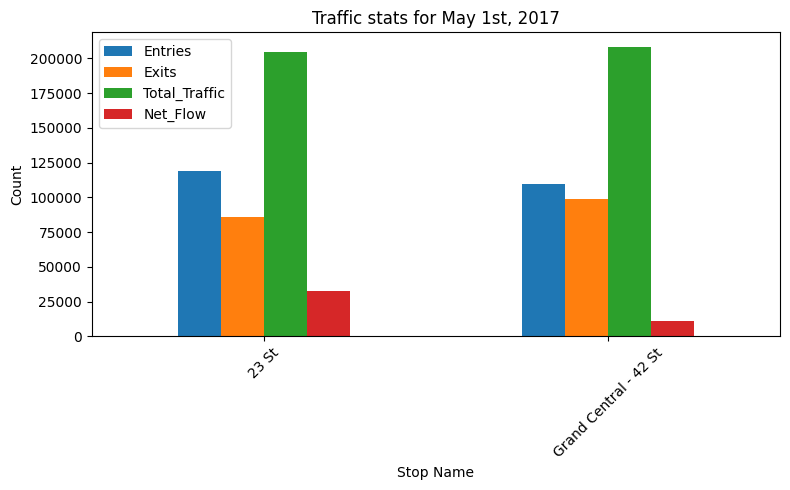

Year 2018:
  Among ['Grand Central - 42 St', '23 St'], station with highest total traffic: Grand Central - 42 St (289380.0 entries + exits)
  Among ['Grand Central - 42 St', '23 St'], station with highest net inflow: 23 St (33709.0 entries - exits)



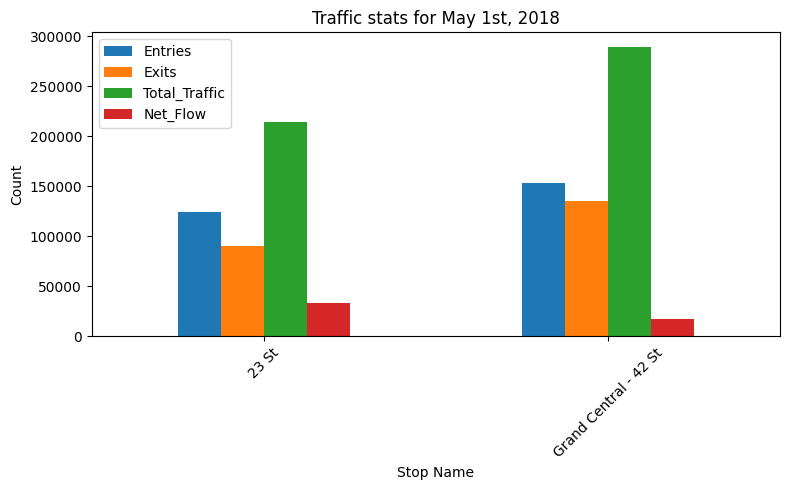

Year 2019:
  Among ['Grand Central - 42 St', '23 St'], station with highest total traffic: Grand Central - 42 St (298758.0 entries + exits)
  Among ['Grand Central - 42 St', '23 St'], station with highest net inflow: 23 St (37114.0 entries - exits)



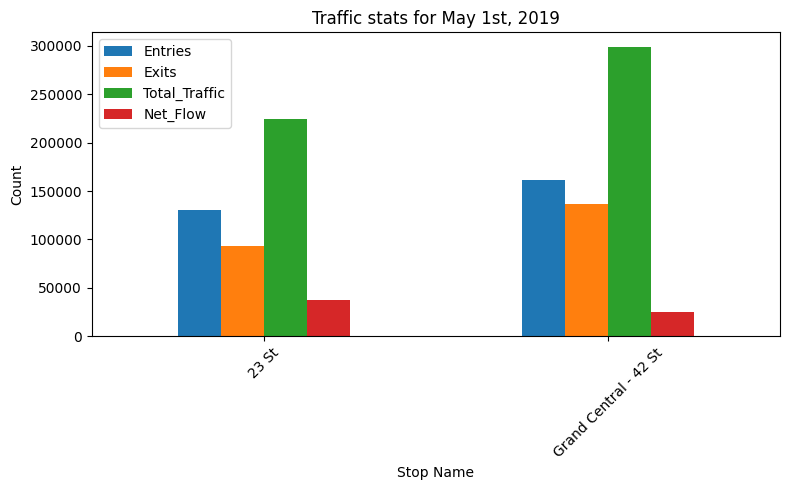

Year 2020:
  Among ['Grand Central - 42 St', '23 St'], station with highest total traffic: Grand Central - 42 St (13493.0 entries + exits)
  Among ['Grand Central - 42 St', '23 St'], station with highest net inflow: 23 St (-546.0 entries - exits)



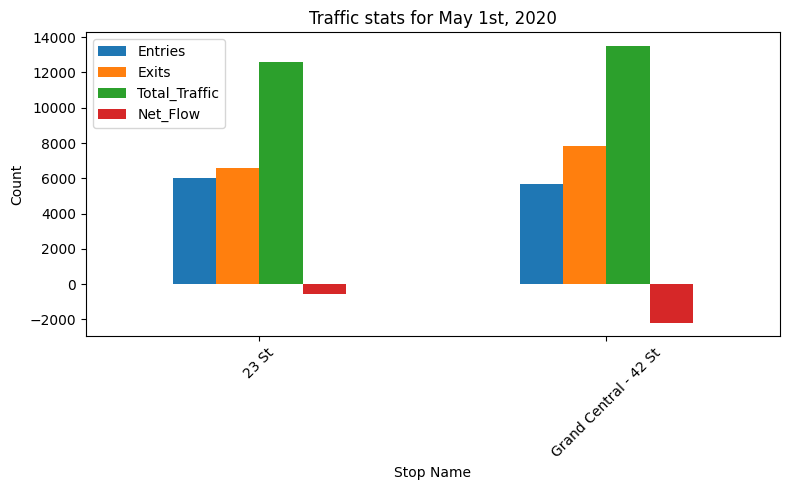

Year 2021:
  Among ['Grand Central - 42 St', '23 St'], station with highest total traffic: 23 St (39728.0 entries + exits)
  Among ['Grand Central - 42 St', '23 St'], station with highest net inflow: 23 St (-3732.0 entries - exits)



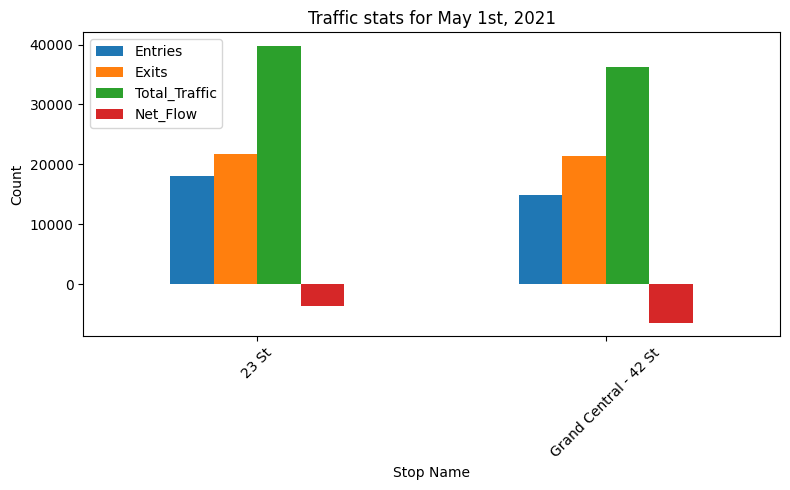

In [11]:
import matplotlib.pyplot as plt

stations = ['Grand Central - 42 St', '23 St']

# Ensure datetime is datetime type
filtered_df['Datetime_formatted'] = pd.to_datetime(filtered_df['Datetime_formatted'])
filtered_df['Year'] = filtered_df['Datetime_formatted'].dt.year
filtered_df['Month'] = filtered_df['Datetime_formatted'].dt.month
filtered_df['Day'] = filtered_df['Datetime_formatted'].dt.day

years = range(2017, 2022)

for year in years:
    # Filter for May 1st of this year
    df_filtered = filtered_df[
        (filtered_df['Year'] == year) &
        (filtered_df['Month'] == 5) &
        (filtered_df['Day'] == 1)
    ]
    
    # Filter only for the two stations
    df_stations = df_filtered[df_filtered['Stop Name'].isin(stations)]
    
    # Group and sum Entries and Exits by station
    traffic_by_station = df_stations.groupby('Stop Name')[['Entries', 'Exits']].sum()
    
    # Calculate total traffic and net flow
    traffic_by_station['Total_Traffic'] = traffic_by_station['Entries'] + traffic_by_station['Exits']
    traffic_by_station['Net_Flow'] = traffic_by_station['Entries'] - traffic_by_station['Exits']
    
    # Find stations with max total traffic and max net flow
    most_populated_station = traffic_by_station['Total_Traffic'].idxmax()
    max_traffic_value = traffic_by_station['Total_Traffic'].max()
    
    station_with_max_net_flow = traffic_by_station['Net_Flow'].idxmax()
    max_net_flow_value = traffic_by_station['Net_Flow'].max()
    
    print(f"Year {year}:")
    print(f"  Among {stations}, station with highest total traffic: {most_populated_station} ({max_traffic_value} entries + exits)")
    print(f"  Among {stations}, station with highest net inflow: {station_with_max_net_flow} ({max_net_flow_value} entries - exits)\n")
    
    # Plotting
    traffic_by_station.plot(kind='bar', y=['Entries', 'Exits', 'Total_Traffic', 'Net_Flow'], figsize=(8,5))
    plt.title(f"Traffic stats for May 1st, {year}")
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



Year 2017 - Grand Central - 42 St (May 1st)
            Entries    Exits  Total_Traffic  Net_Flow
Time_Block                                           
0-3          2249.0    736.0         2985.0    1513.0
4-7          4403.0   7399.0        11802.0   -2996.0
8-11        18025.0  30715.0        48740.0  -12690.0
12-15       19116.0  28605.0        47721.0   -9489.0
16-19       29830.0  16500.0        46330.0   13330.0
20-23       35930.0  14843.0        50773.0   21087.0


/var/folders/88/jmf8wmrx2492bxbr1s_mj_2d126js3/T/ipykernel_10337/2801395103.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Time_Block'] = pd.cut(df_filtered['Hour'], bins=bins, labels=labels, right=False)
/var/folders/88/jmf8wmrx2492bxbr1s_mj_2d126js3/T/ipykernel_10337/2801395103.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_station.groupby('Time_Block')[['Entries', 'Exits']].sum().reset_index()


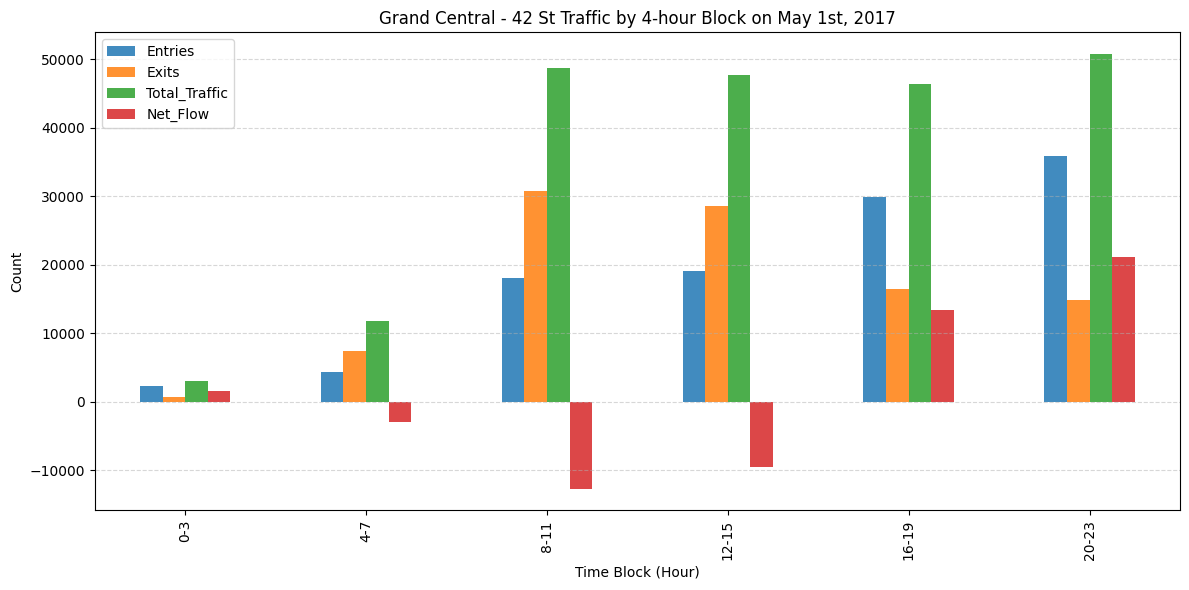

/var/folders/88/jmf8wmrx2492bxbr1s_mj_2d126js3/T/ipykernel_10337/2801395103.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Time_Block'] = pd.cut(df_filtered['Hour'], bins=bins, labels=labels, right=False)
/var/folders/88/jmf8wmrx2492bxbr1s_mj_2d126js3/T/ipykernel_10337/2801395103.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_station.groupby('Time_Block')[['Entries', 'Exits']].sum().reset_index()



Year 2018 - Grand Central - 42 St (May 1st)
            Entries    Exits  Total_Traffic  Net_Flow
Time_Block                                           
0-3          2335.0    401.0         2736.0    1934.0
4-7          5263.0   7516.0        12779.0   -2253.0
8-11        25629.0  41207.0        66836.0  -15578.0
12-15       25946.0  36623.0        62569.0  -10677.0
16-19       43423.0  28961.0        72384.0   14462.0
20-23       50977.0  21099.0        72076.0   29878.0


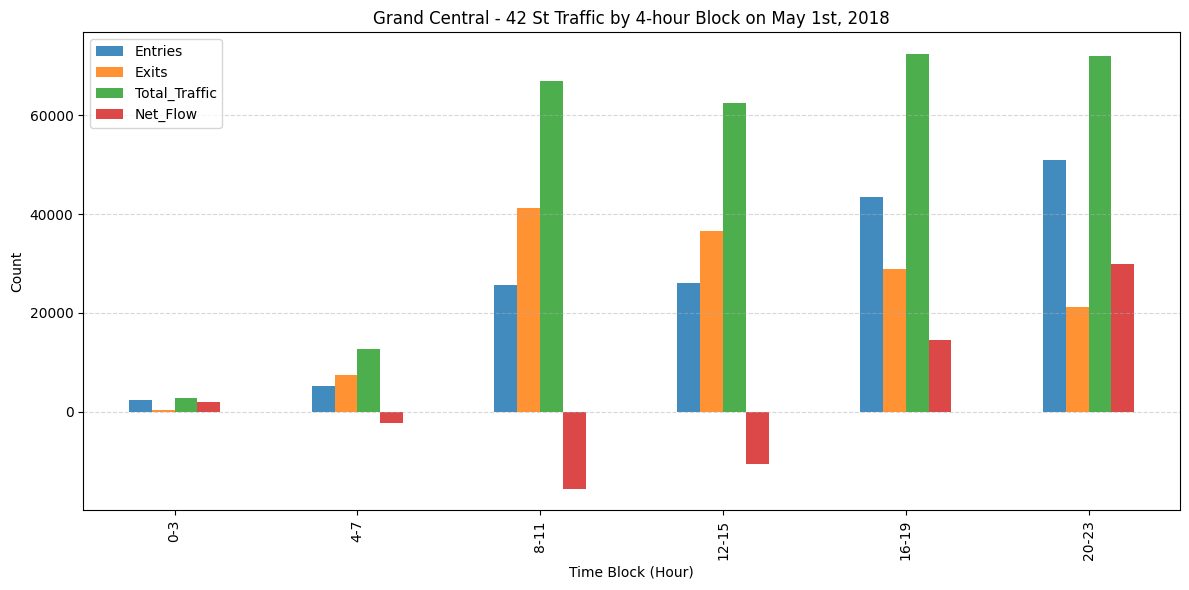

/var/folders/88/jmf8wmrx2492bxbr1s_mj_2d126js3/T/ipykernel_10337/2801395103.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Time_Block'] = pd.cut(df_filtered['Hour'], bins=bins, labels=labels, right=False)
/var/folders/88/jmf8wmrx2492bxbr1s_mj_2d126js3/T/ipykernel_10337/2801395103.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_station.groupby('Time_Block')[['Entries', 'Exits']].sum().reset_index()



Year 2019 - Grand Central - 42 St (May 1st)
            Entries    Exits  Total_Traffic  Net_Flow
Time_Block                                           
0-3          3401.0   1143.0         4544.0    2258.0
4-7          5137.0   7163.0        12300.0   -2026.0
8-11        25849.0  40208.0        66057.0  -14359.0
12-15       27079.0  35253.0        62332.0   -8174.0
16-19       47065.0  28360.0        75425.0   18705.0
20-23       53205.0  24895.0        78100.0   28310.0


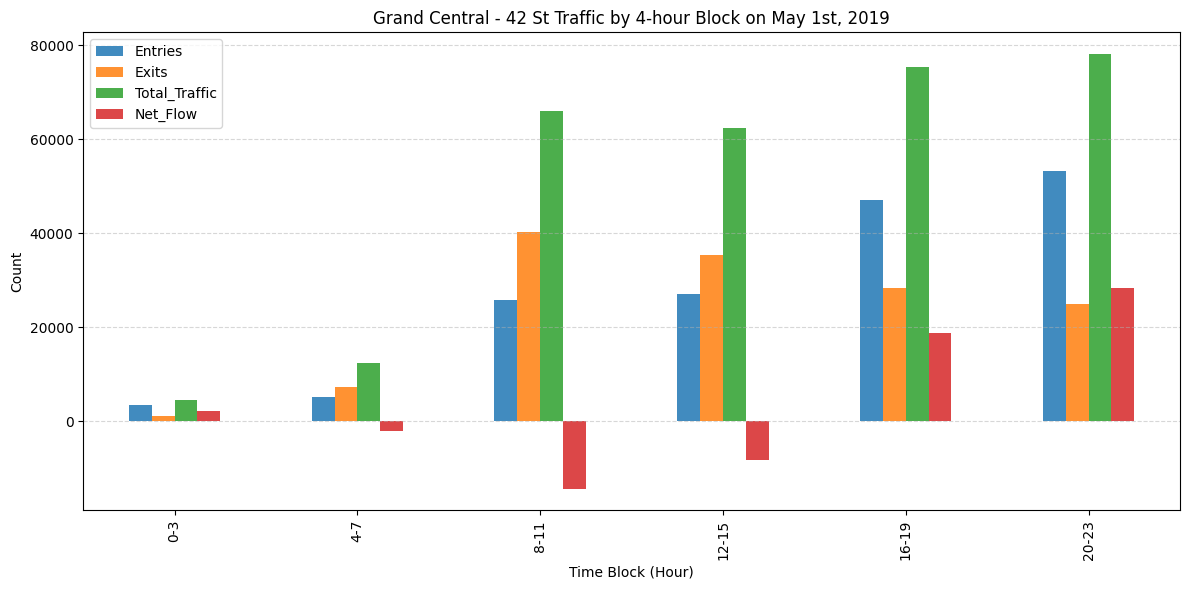

/var/folders/88/jmf8wmrx2492bxbr1s_mj_2d126js3/T/ipykernel_10337/2801395103.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Time_Block'] = pd.cut(df_filtered['Hour'], bins=bins, labels=labels, right=False)
/var/folders/88/jmf8wmrx2492bxbr1s_mj_2d126js3/T/ipykernel_10337/2801395103.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_station.groupby('Time_Block')[['Entries', 'Exits']].sum().reset_index()



Year 2020 - Grand Central - 42 St (May 1st)
            Entries   Exits  Total_Traffic  Net_Flow
Time_Block                                          
0-3           403.0   372.0          775.0      31.0
4-7           300.0   906.0         1206.0    -606.0
8-11          820.0  2197.0         3017.0   -1377.0
12-15        1181.0  1878.0         3059.0    -697.0
16-19        1778.0  1564.0         3342.0     214.0
20-23        1176.0   918.0         2094.0     258.0


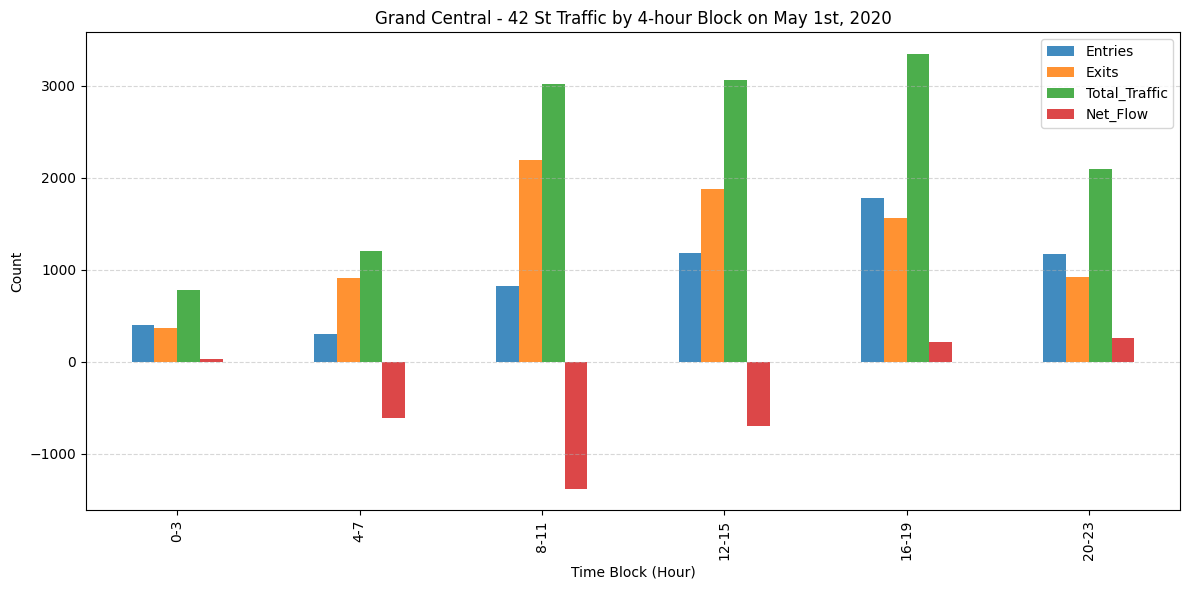

/var/folders/88/jmf8wmrx2492bxbr1s_mj_2d126js3/T/ipykernel_10337/2801395103.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Time_Block'] = pd.cut(df_filtered['Hour'], bins=bins, labels=labels, right=False)
/var/folders/88/jmf8wmrx2492bxbr1s_mj_2d126js3/T/ipykernel_10337/2801395103.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_station.groupby('Time_Block')[['Entries', 'Exits']].sum().reset_index()



Year 2021 - Grand Central - 42 St (May 1st)
            Entries   Exits  Total_Traffic  Net_Flow
Time_Block                                          
0-3          1361.0  1202.0         2563.0     159.0
4-7           217.0   518.0          735.0    -301.0
8-11         1513.0  3628.0         5141.0   -2115.0
12-15        3718.0  5578.0         9296.0   -1860.0
16-19        4696.0  6057.0        10753.0   -1361.0
20-23        3371.0  4342.0         7713.0    -971.0


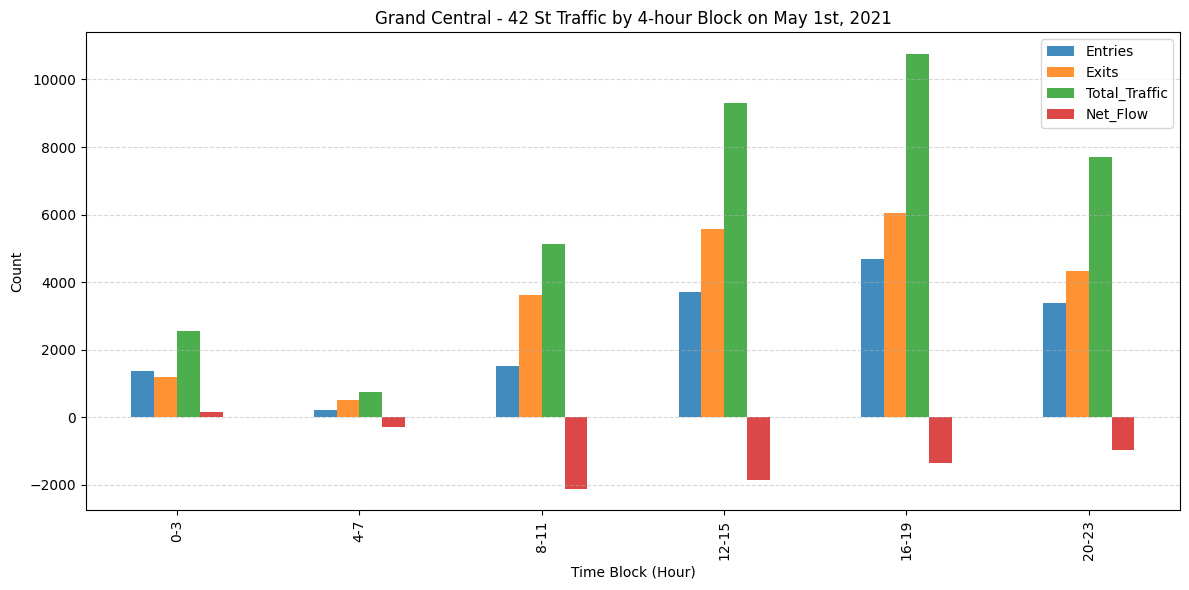

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Define station of interest
station = 'Grand Central - 42 St'

# Ensure datetime is datetime type and extract parts
filtered_df['Datetime_formatted'] = pd.to_datetime(filtered_df['Datetime_formatted'])
filtered_df['Year'] = filtered_df['Datetime_formatted'].dt.year
filtered_df['Month'] = filtered_df['Datetime_formatted'].dt.month
filtered_df['Day'] = filtered_df['Datetime_formatted'].dt.day
filtered_df['Hour'] = filtered_df['Datetime_formatted'].dt.hour

years = range(2017, 2022)

# Define 4-hour time bins and labels
bins = list(range(0, 25, 4))  # [0,4,8,12,16,20,24]
labels = [f'{b}-{b+3}' for b in bins[:-1]]  # ['0-3', '4-7', ..., '20-23']

for year in years:
    # Filter for May 1st of the current year
    df_filtered = filtered_df[
        (filtered_df['Year'] == year) &
        (filtered_df['Month'] == 5) &
        (filtered_df['Day'] == 1)
    ]
    
    # Assign time blocks
    df_filtered['Time_Block'] = pd.cut(df_filtered['Hour'], bins=bins, labels=labels, right=False)
    
    # Filter for the station
    df_station = df_filtered[df_filtered['Stop Name'] == station]
    
    # Group by Time_Block and sum traffic
    grouped = df_station.groupby('Time_Block')[['Entries', 'Exits']].sum().reset_index()
    grouped['Total_Traffic'] = grouped['Entries'] + grouped['Exits']
    grouped['Net_Flow'] = grouped['Entries'] - grouped['Exits']
    grouped = grouped.set_index('Time_Block')

    print(f"\nYear {year} - {station} (May 1st)")
    print(grouped[['Entries', 'Exits', 'Total_Traffic', 'Net_Flow']])

    # Plot vertical bar chart
    ax = grouped[['Entries', 'Exits', 'Total_Traffic', 'Net_Flow']].plot(
        kind='bar', figsize=(12, 6), alpha=0.85
    )
    ax.set_title(f"{station} Traffic by 4-hour Block on May 1st, {year}")
    ax.set_xlabel('Time Block (Hour)')
    ax.set_ylabel('Count')
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


/var/folders/88/jmf8wmrx2492bxbr1s_mj_2d126js3/T/ipykernel_10337/2879279743.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_station.groupby('Time_Block')[['Entries', 'Exits']].sum().reset_index()
/var/folders/88/jmf8wmrx2492bxbr1s_mj_2d126js3/T/ipykernel_10337/2879279743.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_station.groupby('Time_Block')[['Entries', 'Exits']].sum().reset_index()
/var/folders/88/jmf8wmrx2492bxbr1s_mj_2d126js3/T/ipykernel_10337/2879279743.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future versio

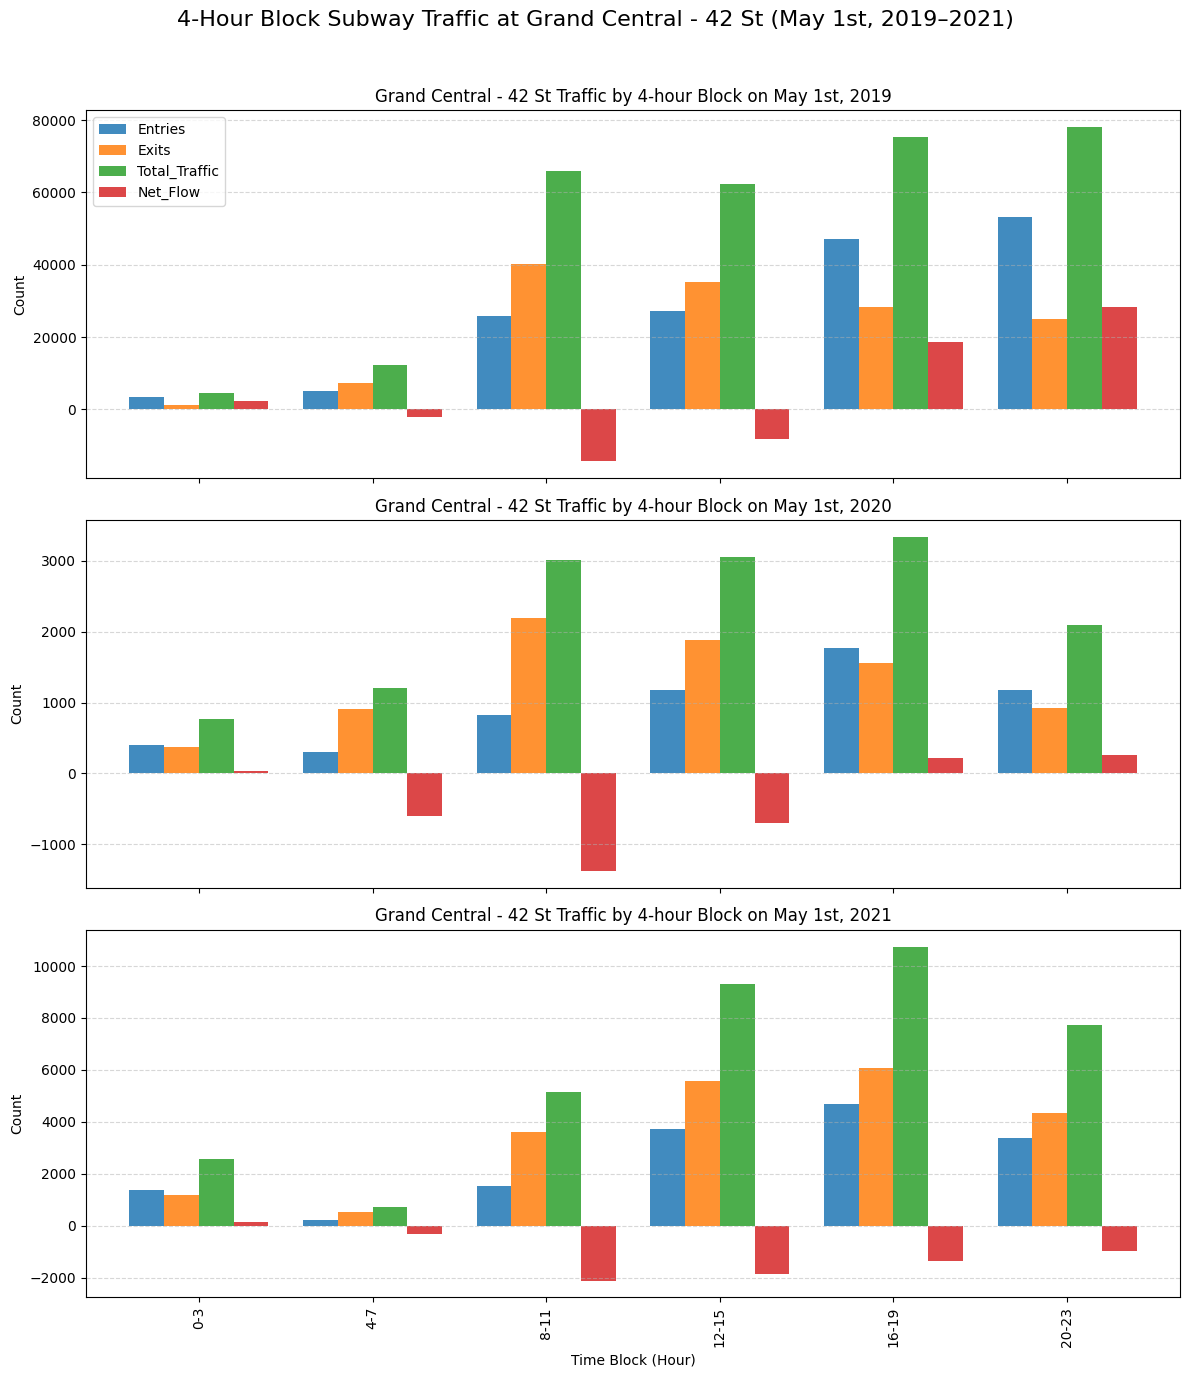

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Station of interest
station = 'Grand Central - 42 St'

# Ensure datetime formatting and extract date parts
filtered_df['Datetime_formatted'] = pd.to_datetime(filtered_df['Datetime_formatted'])
filtered_df['Year'] = filtered_df['Datetime_formatted'].dt.year
filtered_df['Month'] = filtered_df['Datetime_formatted'].dt.month
filtered_df['Day'] = filtered_df['Datetime_formatted'].dt.day
filtered_df['Hour'] = filtered_df['Datetime_formatted'].dt.hour

# Focused years
years = [2019, 2020, 2021]

# 4-hour time bins and labels
bins = list(range(0, 25, 4))  # [0, 4, ..., 24]
labels = [f'{b}-{b+3}' for b in bins[:-1]]  # ['0-3', '4-7', ..., '20-23']

# Set up subplots
fig, axs = plt.subplots(len(years), 1, figsize=(12, 14), sharex=True)

for i, year in enumerate(years):
    # Filter for May 1st of the year
    df_year = filtered_df[
        (filtered_df['Year'] == year) &
        (filtered_df['Month'] == 5) &
        (filtered_df['Day'] == 1)
    ].copy()

    # Assign 4-hour time blocks
    df_year['Time_Block'] = pd.cut(df_year['Hour'], bins=bins, labels=labels, right=False)

    # Filter for the selected station
    df_station = df_year[df_year['Stop Name'] == station]

    # Group and summarize
    grouped = df_station.groupby('Time_Block')[['Entries', 'Exits']].sum().reset_index()
    grouped['Total_Traffic'] = grouped['Entries'] + grouped['Exits']
    grouped['Net_Flow'] = grouped['Entries'] - grouped['Exits']
    grouped = grouped.set_index('Time_Block')

    # Plot on corresponding axis
    grouped[['Entries', 'Exits', 'Total_Traffic', 'Net_Flow']].plot(
        kind='bar', ax=axs[i], alpha=0.85, width=0.8, legend=(i == 0)
    )
    
    axs[i].set_title(f"{station} Traffic by 4-hour Block on May 1st, {year}")
    axs[i].set_ylabel("Count")
    axs[i].grid(axis='y', linestyle='--', alpha=0.5)

# Shared x-label for all plots
plt.xlabel("Time Block (Hour)")
plt.suptitle("4-Hour Block Subway Traffic at Grand Central - 42 St (May 1st, 2019–2021)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


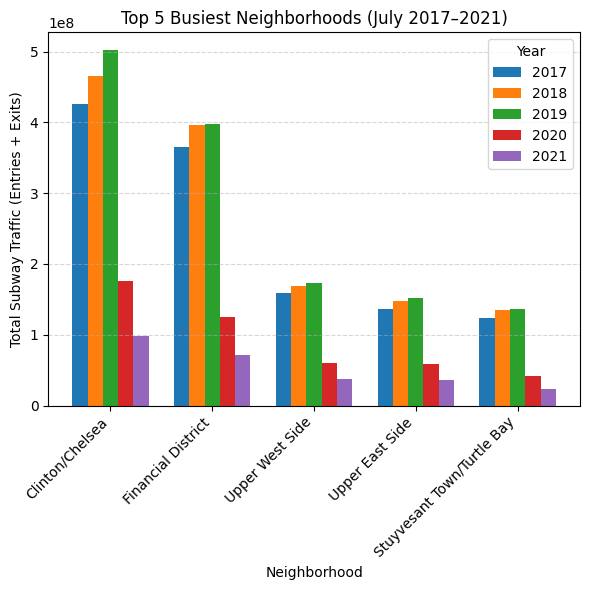

In [ ]:
filtered_df['Total_Traffic'] = filtered_df['Entries'] + filtered_df['Exits']

# Step 1: Get top 5 neighborhoods overall (ignoring boroughs)
top_neighborhoods_overall = (
    filtered_df.groupby('Neighborhood')['Total_Traffic']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index  # Just the top 5 neighborhood names
)

traffic_by_year = pd.DataFrame(index=top_neighborhoods_overall)

for year in range(2017, 2022):
    year_data = filtered_df[filtered_df['Year'] == year]
    yearly_traffic = (
        year_data.groupby('Neighborhood')['Total_Traffic']
        .sum()
        .reindex(top_neighborhoods_overall)  # Only keep top neighborhoods
    )
    traffic_by_year[year] = yearly_traffic

# Step 3: Plot grouped bar chart
traffic_by_year = traffic_by_year.fillna(0)

x = range(len(traffic_by_year))
bar_width = 0.15

plt.figure(figsize=(6, 6))

for i, year in enumerate(traffic_by_year.columns):
    plt.bar(
        [pos + i * bar_width for pos in x],
        traffic_by_year[year].values,
        width=bar_width,
        label=str(year)
    )

# X-axis labels
labels = list(traffic_by_year.index)
plt.xticks([pos + 2 * bar_width for pos in x], labels, rotation=45, ha='right')

plt.xlabel("Neighborhood")
plt.ylabel("Total Subway Traffic (Entries + Exits)")
plt.title("Top 5 Busiest Neighborhoods (July 2017–2021)")
plt.legend(title="Year")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


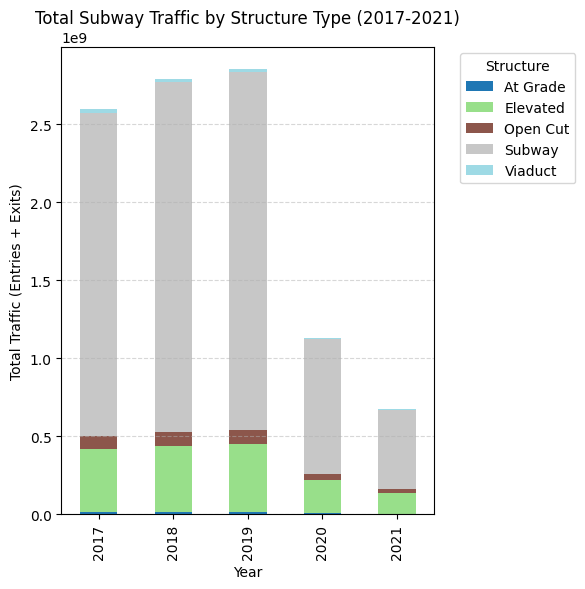

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming filtered_data already has datetime components and 'Total_Traffic' column
# If not, create 'Total_Traffic' first:
filtered_df['Total_Traffic'] = filtered_df['Entries'] + filtered_df['Exits']

# Group by Year and Structure, sum traffic
structure_traffic = (
    filtered_df.groupby(['Year', 'Structure'])['Total_Traffic']
    .sum()
    .reset_index()
)

# Calculate total traffic per year to compute percentages
total_traffic_per_year = (
    structure_traffic.groupby('Year')['Total_Traffic']
    .transform('sum')
)

structure_traffic['Percent_Traffic'] = (
    structure_traffic['Total_Traffic'] / total_traffic_per_year * 100
)

# Pivot the data for easier plotting (Years as index, Structures as columns)
pivot_df = structure_traffic.pivot(index='Year', columns='Structure', values='Total_Traffic')

# Plot
pivot_df.plot(kind='bar', stacked=True, figsize=(6,6), colormap='tab20')

plt.title('Total Subway Traffic by Structure Type (2017-2021)')
plt.ylabel('Total Traffic (Entries + Exits)')
plt.xlabel('Year')
plt.legend(title='Structure', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [ ]:
m = folium.Map(location=[37.7749, -122.4194], zoom_start=12)  # San Francisco
folium.Marker(location=[37.7749, -122.4194], popup='San Francisco').add_to(m)
display(m)


In [ ]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# Sample data (you can replace this with your own DataFrame)
data = pd.DataFrame({
    'lat': [37.7749, 34.0522, 40.7128, 41.8781, 29.7604],
    'lon': [-122.4194, -118.2437, -74.0060, -87.6298, -95.3698]
})

# Create a base map centered over the US
m = folium.Map(location=[39.5, -98.35], zoom_start=4)

# Prepare the data in list format for HeatMap
heat_data = [[row['lat'], row['lon']] for _, row in data.iterrows()]

# Add heatmap layer
HeatMap(heat_data).add_to(m)

# Display map (in Jupyter or compatible environment)
m


In [ ]:
import folium
from folium.plugins import HeatMap

# Filter or prepare your data
# Example: drop missing coordinates
heat_data = df[['Latitude', 'Longitude']].dropna().values.tolist()

# If you want to weight by traffic:
# heat_data = df[['Latitude', 'Longitude', 'Total_Traffic']].dropna().values.tolist()

# Create base map centered around NYC
m = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Add heatmap
HeatMap(heat_data, radius=10).add_to(m)

# Save or display
m.save("nyc_heatmap.html")


In [ ]:
import folium
from folium.plugins import HeatMap
from sklearn.preprocessing import MinMaxScaler

# Ensure 'Month' column exists
filtered_df['Month'] = filtered_df['Datetime_formatted'].dt.month

# Filter for the years of interest
years = [2019, 2020, 2021]

for year in years:
    # Filter for June of the given year
    year_df = filtered_df[
        (filtered_df['Year'] == year) &
        (filtered_df['Month'] == 6)
    ][['Latitude', 'Longitude', 'Total_Traffic']].dropna()

    if year_df.empty:
        print(f"No data for June {year}")
        continue

    # Normalize Total_Traffic for heat intensity (scale 0 to 1)
    scaler = MinMaxScaler()
    year_df['Weight'] = scaler.fit_transform(year_df[['Total_Traffic']])

    # Format for HeatMap: [lat, lon, weight]
    heat_data = year_df[['Latitude', 'Longitude', 'Weight']].values.tolist()

    # Create base map centered around NYC
    m = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

    # Add HeatMap layer with weights
    HeatMap(heat_data, radius=10, blur=15, max_zoom=1).add_to(m)

    # Save the heatmap
    m.save(f"heatmap_june_{year}.html")
    print(f"Saved: heatmap_june_{year}.html with {len(heat_data)} weighted points.")


Saved: heatmap_june_2019.html with 83574 weighted points.
Saved: heatmap_june_2020.html with 83775 weighted points.
Saved: heatmap_june_2021.html with 83913 weighted points.
